## Comparing Clusters with Compact Objects: With and Without Companions

In testing the addition of substellar objects into SPISEA, we have come across a curious problem. When generating a cluster with an IMFR and allowing for companions, we end up creating substellar mass compact objects, which does not make much sense. This is happening before modification of the code to specify brown dwarves as their own phase.

#### Importing the Necessary Packages:

In [1]:
# Import necessary packages. 
from spisea import synthetic, evolution, atmospheres, reddening, ifmr
from spisea.imf import imf, multiplicity
import numpy as np
import pylab as py
import pdb
import matplotlib.pyplot as plt
%matplotlib inline

### Cluster 1: Without Companions

In [3]:
# Create isochrone object  
filt_list = ['wfc3,ir,f153m'] # We won't be doing much with synthetic photometry here, so only 1 filter
my_ifmr = ifmr.IFMR_Raithel18()
my_iso = synthetic.IsochronePhot(8, 0, 10,
                                 evo_model = evolution.MergedBaraffePisaEkstromParsec(),
                                      filters=filt_list)

In [3]:
# Create IMF objects                                                                                                                                                     
k_imf = imf.Weidner_Kroupa_2004()

In [4]:
# Make cluster
cluster_mass = 10**6
k_cluster = synthetic.ResolvedCluster(my_iso, k_imf, cluster_mass, ifmr=my_ifmr)

# Get outputs
k_out = k_cluster.star_systems

Found 907596 stars out of mass range


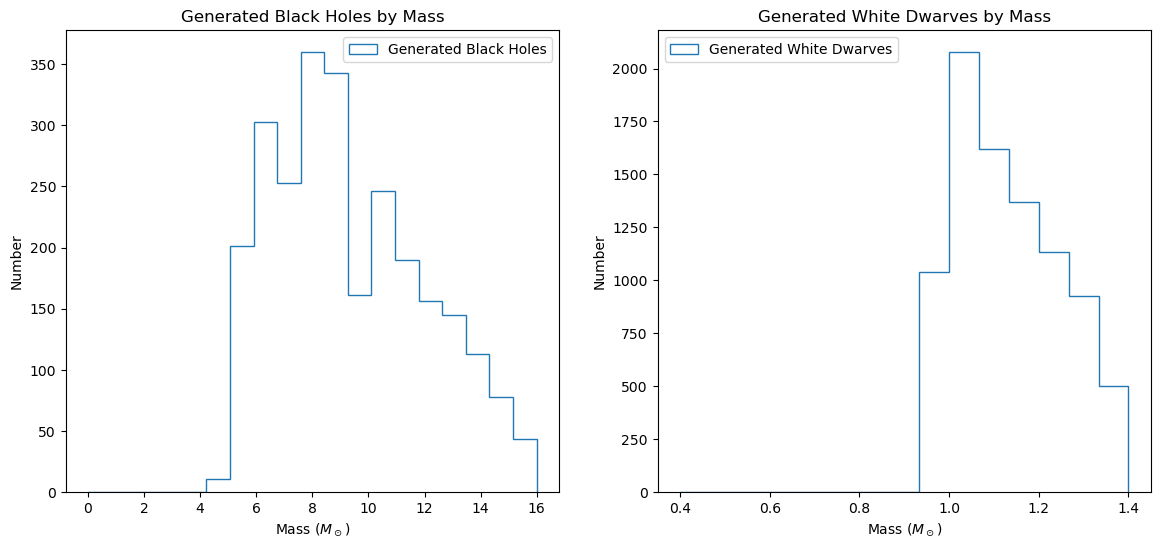

In [5]:
# Locate BHs, NSs and WDs
p_bh = np.where(k_out['phase'] == 103)[0]
p_ns = np.where(k_out['phase'] == 102)[0]
p_wd = np.where(k_out['phase'] == 101)[0]

# Plot on histograms
bh_bins = np.linspace(0.01, 16, 20)
wd_bins = np.linspace(0.4, 1.4, 16)

plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.hist(k_out[p_bh]['mass_current'], histtype = 'step',
        bins = bh_bins, label = 'Generated Black Holes')
plt.title("Generated Black Holes by Mass")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(k_out[p_wd]['mass_current'], histtype = 'step',
        bins = wd_bins, label = 'Generated White Dwarves')
plt.title("Generated White Dwarves by Mass")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.show()

In [7]:
# Finding the minimum mass of a generated object
print("Smallest mass of a generated object: " + str(np.min(k_out['mass'])))

Smallest mass of a generated object: 0.07000011975637106


In [9]:
# Finding the minimum/maximum inital mass of generated black holes
print("Initial mass of smallest generated black hole: " + str(np.min(k_out[p_bh]['mass'])))
print("Initial mass of largest generated black hole: " + str(np.max(k_out[p_bh]['mass'])))

Initial mass of smallest generated black hole: 15.014691323167467
Initial mass of largest generated black hole: 119.74791889840289


This cluster fits the expectation from imfr.py that black holes are between 15-120 solar masses and white dwarves are at least 0.5 solar masses, even with the addition of substellar primary objects. 

### Cluster 2: With Companions

For this cluster we are using the same isochrone as Cluster 1, just changing our IMF to allow for systems with companions.

In [4]:
# Create IMF objects                                                                                                                                                     
imf_multi = multiplicity.MultiplicityUnresolved()
kc_imf = imf.Weidner_Kroupa_2004(multiplicity=imf_multi)

In [5]:
# Make cluster
cluster_mass = 10**6
kc_cluster = synthetic.ResolvedCluster(my_iso, kc_imf, cluster_mass, ifmr=my_ifmr)

# Get outputs
kc_out = kc_cluster.star_systems
kc_comp = kc_cluster.companions

Found 686912 stars out of mass range
Found 134402 companions out of stellar mass range


In [8]:
print(kc_comp['mass'], kc_comp['Teff'])

        mass        
--------------------
  0.5747159412207477
  0.6970586660858713
   0.601165124305441
0.056083697312291306
 0.02673063039645824
  0.1862915740843192
 0.07159040923670096
                 ...
  0.0830220943719863
 0.09156100383230333
  0.3808927106160393
0.016698205202363158
  0.4183953590905605
  0.0758085193857225
  0.3082346627668261
Length = 391314 rows        Teff       
------------------
 4068.981641477723
  4492.75426907755
 4126.083901944962
               nan
               nan
3234.0110881285427
2808.0618989378295
               ...
 2898.061169580272
  2950.46139583484
3506.1448705814614
               nan
 3566.917126729317
2845.0651718291647
3418.8421815545435
Length = 391314 rows


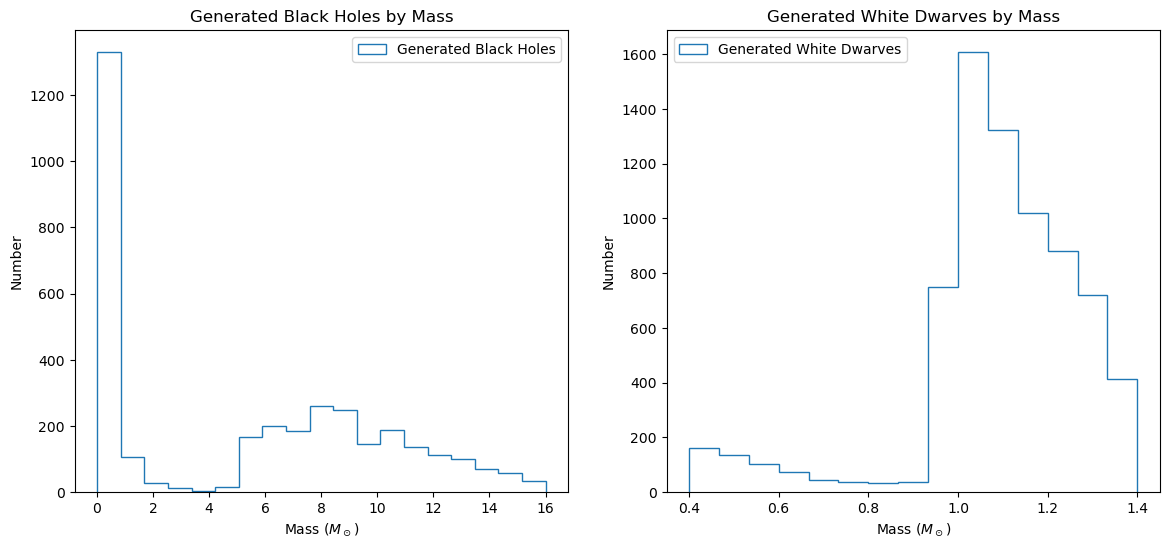

In [6]:
# Locate BHs, NSs and WDs
p2_bh = np.where(kc_out['phase'] == 103)[0]
c_bh = np.where(kc_comp['phase'] == 103)[0]
k_bh = np.concatenate([p2_bh, c_bh])
p2_ns = np.where(kc_out['phase'] == 102)[0]
c_ns = np.where(kc_comp['phase'] == 102)[0]
k_ns = np.concatenate([p2_ns, c_ns])
p2_wd = np.where(kc_out['phase'] == 101)[0]
c_wd = np.where(kc_comp['phase'] == 101)[0]
k_wd = np.concatenate([p2_wd, c_wd])

# Plot on histograms
bh_bins = np.linspace(0.01, 16, 20)
wd_bins = np.linspace(0.4, 1.4, 16)

plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.hist(kc_out[k_bh]['mass_current'], histtype = 'step',
        bins = bh_bins, label = 'Generated Black Holes')
plt.title("Generated Black Holes by Mass")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(kc_out[k_wd]['mass_current'], histtype = 'step',
        bins = wd_bins, label = 'Generated White Dwarves')
plt.title("Generated White Dwarves by Mass")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.show()

In [17]:
# Finding the minimum mass of generated objects
print("Smallest mass of a primary generated object: " + str(np.min(kc_out['mass'])))
print("Smallest mass of a companion generated object: " + str(np.min(kc_comp['mass'])))

Smallest mass of a primary generated object: 0.07000003602252991
Smallest mass of a companion generated object: 0.010000123044113119


In [18]:
# Finding the minimum/maximum inital masses of generated black holes
print("Initial mass of smallest generated black hole: " + str(np.min(kc_out[k_bh]['mass'])))
print("Initial mass of largest generated black hole: " + str(np.max(kc_out[k_bh]['mass'])))

Initial mass of smallest generated black hole: 0.0700493749164032
Initial mass of largest generated black hole: 119.95339215013136


In this case, we are getting many instances of substellar mass blakc holes, which does not make sense. Why is it that adding companions introduces this issue?

In [21]:
# Create IMF objects                                                                                                                                                     
imf_multi_resolved = multiplicity.MultiplicityResolvedDK()
c3_imf = imf.Weidner_Kroupa_2004(multiplicity=imf_multi_resolved)

In [22]:
# Make cluster
cluster_mass = 10**6
cluster3 = synthetic.ResolvedCluster(my_iso, c3_imf, cluster_mass, ifmr=my_ifmr)

# Get outputs
c3_out = cluster3.star_systems
c3_comp = cluster3.companions

Found 694055 stars out of mass range
Found 136094 companions out of stellar mass range


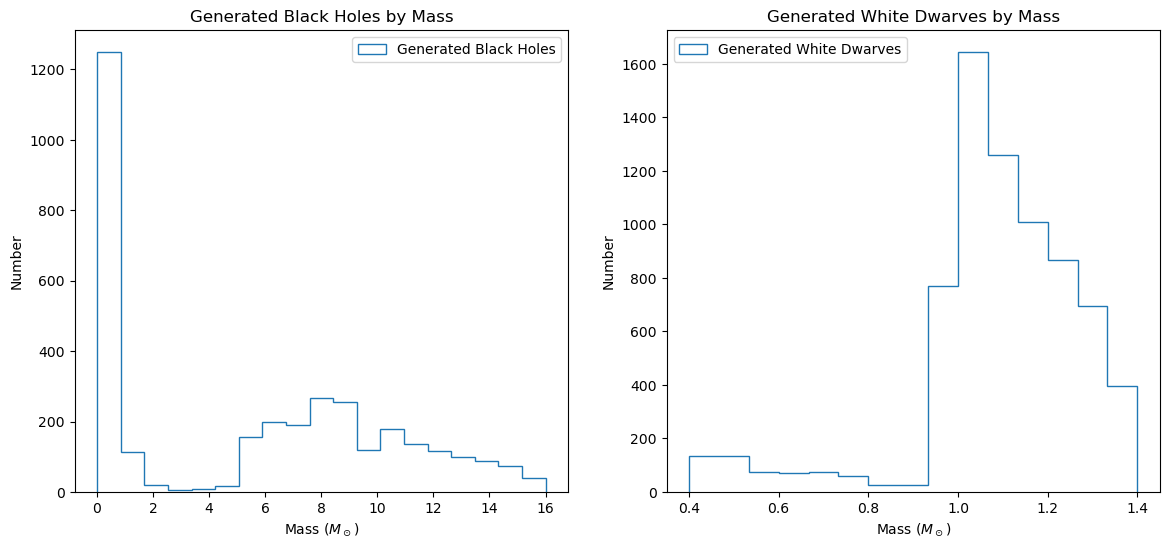

In [23]:
# Locate BHs, NSs and WDs
p3_bh = np.where(c3_out['phase'] == 103)[0]
c3_bh = np.where(c3_comp['phase'] == 103)[0]
k3_bh = np.concatenate([p3_bh, c3_bh])
p3_ns = np.where(c3_out['phase'] == 102)[0]
c3_ns = np.where(c3_comp['phase'] == 102)[0]
k3_ns = np.concatenate([p3_ns, c3_ns])
p3_wd = np.where(c3_out['phase'] == 101)[0]
c3_wd = np.where(c3_comp['phase'] == 101)[0]
k3_wd = np.concatenate([p3_wd, c3_wd])

# Plot on histograms
bh_bins = np.linspace(0.01, 16, 20)
wd_bins = np.linspace(0.4, 1.4, 16)

plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.hist(c3_out[k3_bh]['mass_current'], histtype = 'step',
        bins = bh_bins, label = 'Generated Black Holes')
plt.title("Generated Black Holes by Mass")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(c3_out[k3_wd]['mass_current'], histtype = 'step',
        bins = wd_bins, label = 'Generated White Dwarves')
plt.title("Generated White Dwarves by Mass")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.show()

This is still the case when the companion objects are resolved.